# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula</pre>$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $
 <pre>
    print the mean squared error with predicted ratings
    </pre>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [1]:
import pandas as pd
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [2]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.zeros([943 , 1681])
for i in range(len(data)):
    user , movie , rating = data.iloc[i , :]
    matrix[user][movie] = rating
    
U, Sigma, VT = randomized_svd(matrix, n_components=50,n_iter=10, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 50)
(50,)
(1681, 50)


In [3]:
b = np.random.uniform(0,1,943)
c = np.random.uniform(0,1,1681)
mu = sum(data.iloc[:,2])/len(data)
def sq_sum(var):
    for i in var:
        s = 0
        s += i**2
    return s

In [4]:
epochs = []
losses = []
from sklearn.metrics import log_loss
for i in range(30): # number of epochs
    for j in range(len(data)):
        user , movie , y = data.iloc[j,:]
        ui = U[user]
        vj = VT.T[movie]
        bi = b[user]
        cj = c[movie]
        loss = 0.001*( 00.1*2*sum(b) -2*(y - mu - b[user] -c[movie] - np.matmul(ui , vj)) )
        bi = bi - loss
        
        loss = 0.001*( 00.1*2*sum(c)  -2*(y - mu - b[user] -c[movie] - np.matmul(ui , vj)) )
        cj = cj - loss
        b[user] = bi
        c[movie] = cj
    
    mse = 0
    for j in range(len(data)):
        user , movie , y = data.iloc[j , :]
        ui = U[user]
        vj = VT.T[movie]
        y_pred = np.matmul(ui,vj.T) + mu + b[user] + c[movie]
        mse += (y - y_pred)**2
    mse/=len(data)
    print("MSE At Epoch" , i ," is " ,  mse)
    epochs.append(i)
    losses.append(mse)

MSE At Epoch 0  is  3.1647122512568555
MSE At Epoch 1  is  2.36535933800418
MSE At Epoch 2  is  1.9302191127035169
MSE At Epoch 3  is  1.6620383409868134
MSE At Epoch 4  is  1.4825817857113133
MSE At Epoch 5  is  1.3553901322634123
MSE At Epoch 6  is  1.261369107410276
MSE At Epoch 7  is  1.18961602914425
MSE At Epoch 8  is  1.1334781753457828
MSE At Epoch 9  is  1.0886769002249839
MSE At Epoch 10  is  1.052340683321186
MSE At Epoch 11  is  1.0224735591285017
MSE At Epoch 12  is  0.9976469073850751
MSE At Epoch 13  is  0.9768125546938212
MSE At Epoch 14  is  0.9591850228743635
MSE At Epoch 15  is  0.9441648588499636
MSE At Epoch 16  is  0.9312872647673045
MSE At Epoch 17  is  0.9201868062224883
MSE At Epoch 18  is  0.9105726243188988
MSE At Epoch 19  is  0.9022106801348434
MSE At Epoch 20  is  0.8949108115835039
MSE At Epoch 21  is  0.8885171487825367
MSE At Epoch 22  is  0.8829009151806523
MSE At Epoch 23  is  0.8779549508529355
MSE At Epoch 24  is  0.8735894972229618
MSE At Epoch 25 

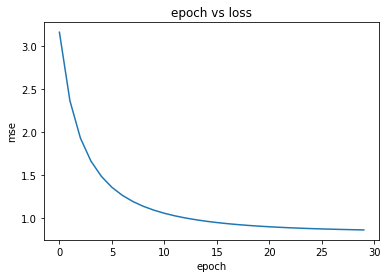

In [6]:
import matplotlib.pyplot as plt
plt.plot(epochs , losses)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('epoch vs loss')
plt.show()


In [7]:
mse = 0
for i in range(len(data)):
    user , movie , y = data.iloc[i , :]
    ui = U[user]
    vj = VT.T[movie]
    y_pred = np.matmul(ui,vj.T) + mu + b[user] + c[movie]
    
    mse += (y - y_pred)**2
mse/=len(data)
print("MSE:" , mse)

MSE: 0.8581866882507159


### Task 2

In [8]:
info_age_list = pd.read_csv('user_info.csv').iloc[:,2]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression(C=10**3)
model.fit(U , info_age_list)
y_pred = model.predict(U)       

In [27]:
print("Confusion Matrix\n " , confusion_matrix(info_age_list , y_pred)) # confusion matrix

Confusion Matrix
  [[111 162]
 [ 47 623]]


In [28]:
from sklearn.metrics import log_loss
model.predict_proba(U)
print(log_loss(info_age_list,model.predict_proba(U))) # log loss

0.4466428941961595


In [12]:
### generated user features are pretty much useful in interpretting some information such as gender.